In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
ls

 Volume in drive C is Acer
 Volume Serial Number is 1023-C329

 Directory of C:\Users\Uttam\Desktop\Ds\pytorch

28-07-2020  18:51    <DIR>          .
28-07-2020  18:51    <DIR>          ..
28-07-2020  18:11    <DIR>          .ipynb_checkpoints
28-07-2020  18:12            23,873 diabetes.csv
27-07-2020  19:12               305 pytorch_env.yml
28-07-2020  18:09            16,438 torch_basic.ipynb
28-07-2020  18:51           777,610 Untitled.ipynb
               4 File(s)        818,226 bytes
               3 Dir(s)  92,204,883,968 bytes free


In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df_new = df.copy()

In [7]:
df['Outcome']= np.where(df['Outcome']==1,'Diabetic','Non Diabetic')

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


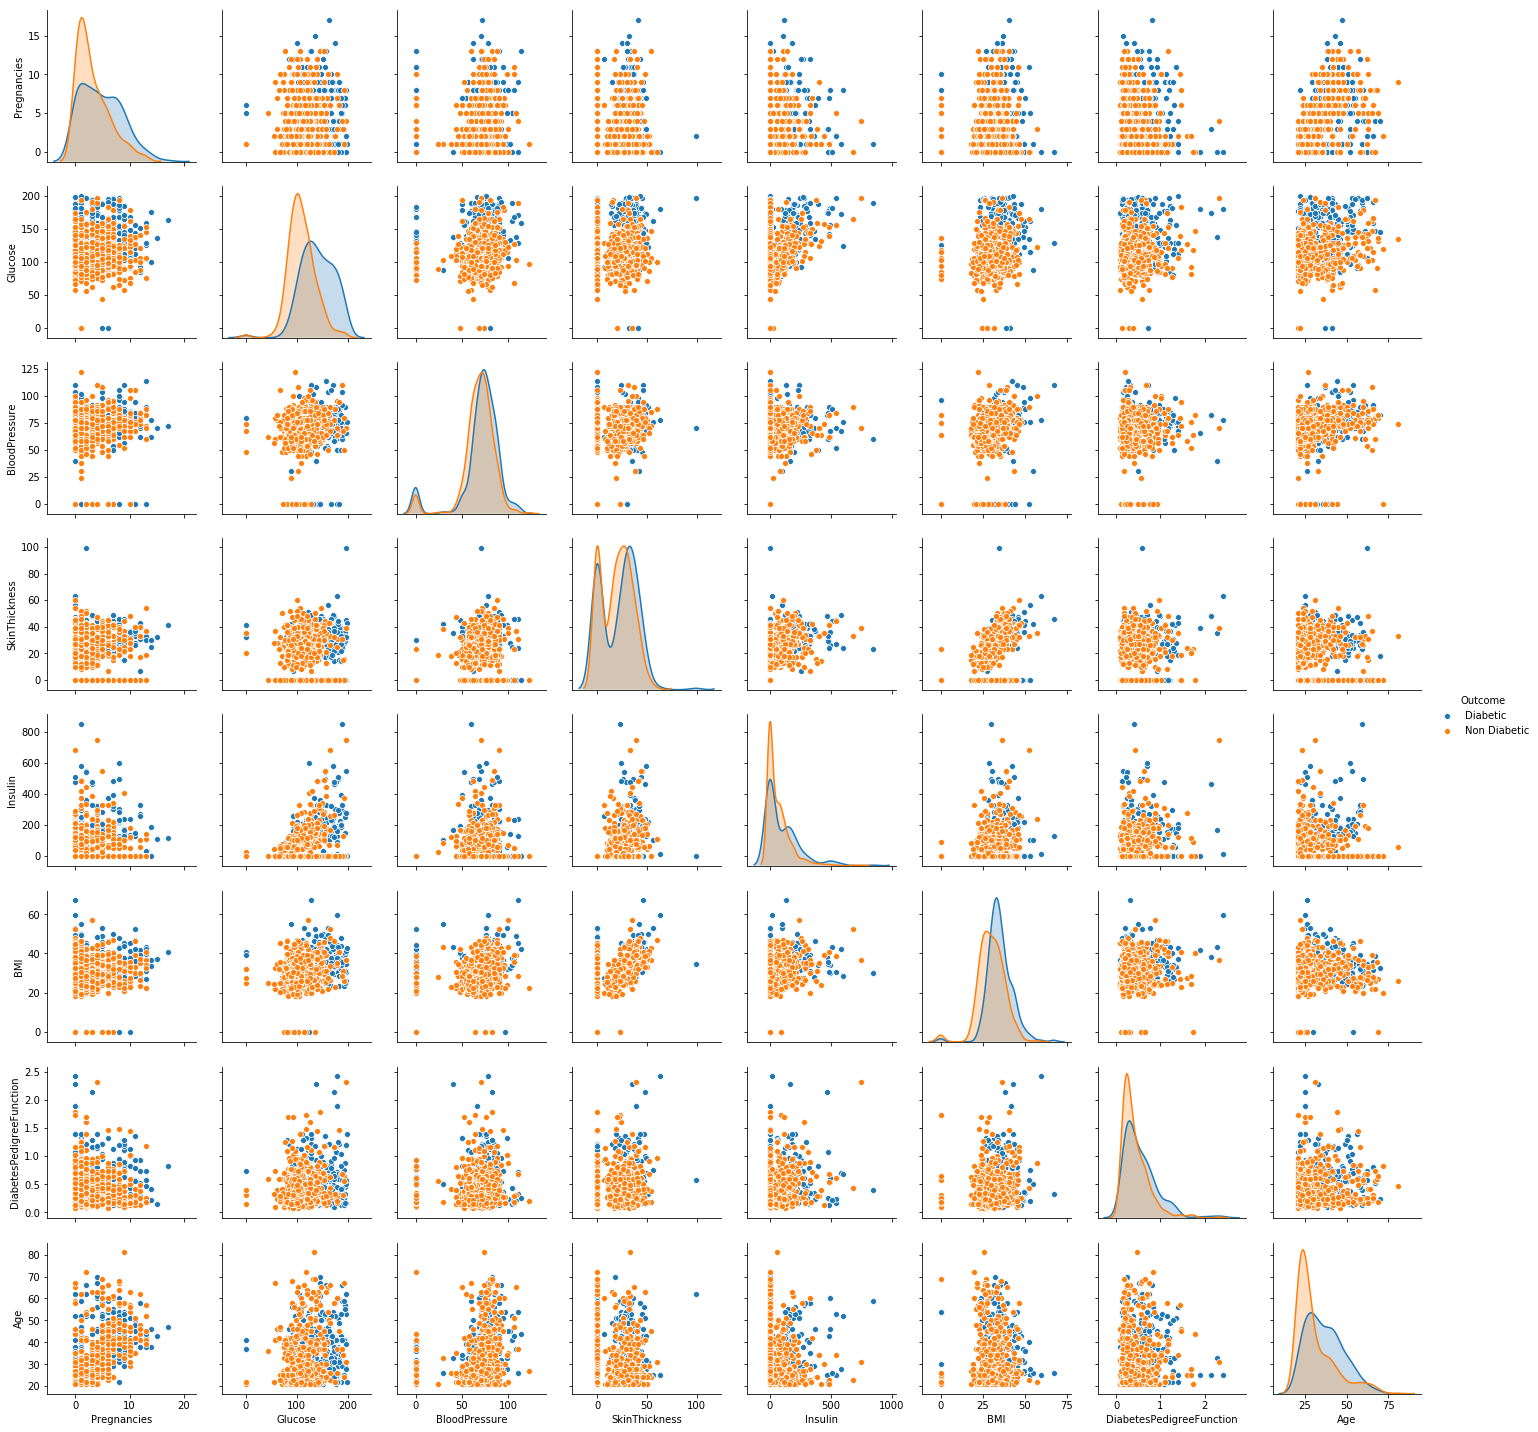

In [9]:
sns.pairplot(df, hue='Outcome')

In [10]:
df_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
X = df_new.drop('Outcome', axis=1).values # independent variable
y = df_new['Outcome'].values # dependent variable

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2,random_state= 0)

In [13]:
X_train.shape ,X_test.shape

((614, 8), (154, 8))

In [14]:
y_train.shape, y_test.shape

((614,), (154,))

In [15]:
# import torch lib,
import torch
import torch.nn as nn
import torch.nn.functional as F

In [16]:
# creating tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train= torch.LongTensor(y_train)
y_test= torch.LongTensor(y_test)

In [17]:
class ANN_Model(nn.Module):
    def __init__(self, input_features=8, hidden1=20, hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out= nn.Linear(hidden2,out_features)
    def forward(self,x):
        x= F.relu(self.f_connected1(x))
        X= F.relu(self.f_connected2(x))
        x= self.out(x)
        return x

In [18]:
# instanciatiate ann model
torch.manual_seed(20)
model = ANN_Model()

In [19]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [20]:
## back prop- define loss func, optimisers
loss_function = nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(),lr=0.01)

In [21]:
epochs = 500
final_losses= []
for i in range(epochs):
    i = i+1
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_losses.append(loss)
    if i%10==1:
        print(f'Epoch number {i} and loss is {loss.item()}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number 1 and loss is 9.603046417236328
Epoch number 11 and loss is 1.630615472793579
Epoch number 21 and loss is 1.0135409832000732
Epoch number 31 and loss is 0.692304790019989
Epoch number 41 and loss is 0.7074200510978699
Epoch number 51 and loss is 0.6359280347824097
Epoch number 61 and loss is 0.6173062324523926
Epoch number 71 and loss is 0.6041491627693176
Epoch number 81 and loss is 0.5932952761650085
Epoch number 91 and loss is 0.5844234228134155
Epoch number 101 and loss is 0.5779842734336853
Epoch number 111 and loss is 0.572888970375061
Epoch number 121 and loss is 0.568362832069397
Epoch number 131 and loss is 0.5640638470649719
Epoch number 141 and loss is 0.5600718259811401
Epoch number 151 and loss is 0.5562390089035034
Epoch number 161 and loss is 0.5522443652153015
Epoch number 171 and loss is 0.5484827160835266
Epoch number 181 and loss is 0.5453131198883057
Epoch number 191 and loss is 0.5423081517219543
Epoch number 201 and loss is 0.5394620895385742
Epoch nu

In [22]:
#plotting losses
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'epoch')

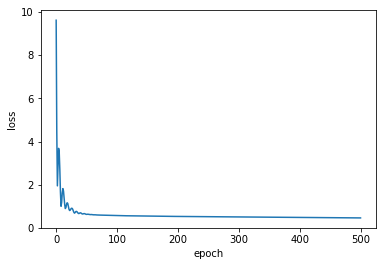

In [23]:
plt.plot(range(epochs), final_losses)
plt.ylabel('loss')
plt.xlabel('epoch')

In [29]:
predictions =[]

with torch.no_grad():
    for i , data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
1
0
1
0
0
0
0
1
0
1
0
1
0
1
0
0
0
0
1
0
0
1
0
0
1
0
1
1
0
1
1
0
0
0
1
1
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
1
1
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0


In [30]:
predictions

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[89, 18],
       [19, 28]], dtype=int64)

Text(69.0, 0.5, 'Predicted values')

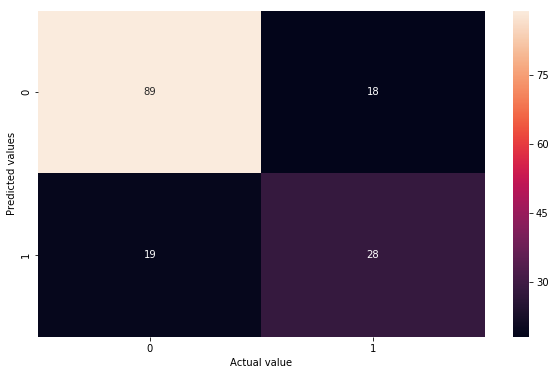

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True)
plt.xlabel('Actual value')
plt.ylabel('Predicted values')

In [35]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
score

0.7597402597402597

In [36]:
#saving model
torch.save(model, 'dia.pt')

C:\Users\Uttam\anaconda3\envs\envpytorch\lib\site-packages\torch\serialization.py:402: UserWarning: Couldn't retrieve source code for container of type ANN_Model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [38]:
#loading model
model = torch.load('dia.pt')

In [39]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [40]:
# pred for new data
list(df.iloc[0,:-1])

[6, 148, 72, 35, 0, 33.6, 0.627, 50]

In [41]:
#new data 
lst1= [9, 148, 77, 35, 0, 33.6, 0.627, 40]

In [42]:
new_data = torch.Tensor(lst1)

In [44]:
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([6.9066, 7.6808])
1
